# <div style="text-align: center">Random Forests - Hohenberg-Kohn Mapping - Solid-State</div> 
 
## <div style="text-align: center">Jon Vandermause, Steven Torrisi, Simon Batzner</div> 

## <div style="text-align: center">Potential-to-Density</div> 

In [18]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from KRR_reproduce import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
# setup
ev2kcal = 1/0.043       # conversion factor
SEED = 42
SIM_NO = 201            # total number of data points
M = 15                 # number of training points

# random forest
N_ESTIMATORS = 1000      # number of trees
MAX_DEPTH = 50          # maximum depth of trees

# alternate params
# N_ESTIMATORS = 5000   # number of treest
# MAX_DEPTH = 200       # maximum depth of trees

# path to data
os.environ['PROJDIR'] = '/Users/simonbatzner1/Desktop/Research/Research_Code/ML-electron-density'
STR_PREF = os.environ['PROJDIR']+'/Aluminium_Dataset/Store/'

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))

Number of estimators: 1000
Maximum depth: 50


## Load data

In [20]:
pos = []
ens = []
fours = []

for n in range(SIM_NO):
    # load arrays
    en_curr = np.reshape(np.load(STR_PREF+'en_store/energy'+str(n)+'.npy'),(1))[0]
    pos_curr = np.load(STR_PREF+'pos_store/pos'+str(n)+'.npy')
    four_curr = np.load(STR_PREF+'four_store/four'+str(n)+'.npy')
    
    # store arrays
    ens.append(en_curr)
    pos_curr = pos_curr.flatten()
    pos.append(pos_curr)
    fours.append(four_curr)

# convert to np arrays
ens = np.array(ens)
pos = np.array(pos)
fours = np.array(fours)

In [21]:
fours_flattened = []

for n in range(SIM_NO):
    four = fours[n]
    four = four.flatten()
    four= np.absolute(four)
    fours_flattened.append(four)
    
data = pos
labels = fours_flattened

# define training and test indices
train_indices = [int(n) for n in np.round(np.linspace(0,200,M))]
test_indices = [n for n in range(201) if n not in train_indices]

if len(train_indices) != M: 
    print("Size of training set doesn't match the M specified")
    
x_train = np.array([data[n] for n in train_indices])
x_test = np.array([data[n] for n in test_indices])
y_train = np.array([labels[n] for n in train_indices])
y_test =np.array([labels[n] for n in test_indices])

# convert to np arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(15, 12)
(186, 12)
(186, 15625)


In [22]:
# train random forest
estimator = RandomForestRegressor(random_state=0, n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH)
print("Training...\n")
estimator.fit(x_train, y_train)

Training...



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
# eval on training data
y_true_train, y_pred_train = y_train, estimator.predict(x_train)

# eval on test data
y_true, y_pred = y_test, estimator.predict(x_test)

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))
print("\nMAE on training data:\t{}".format(mean_absolute_error(y_true_train, y_pred_train)))
print("MAE on test data:\t{}".format(mean_absolute_error(y_true, y_pred)))

print("\nPredicted Fourier components:\n")
print(y_pred)

y_pot2four_pred = y_pred

Number of estimators: 1000
Maximum depth: 50

MAE on training data:	0.009333974222791119
MAE on test data:	0.02542748803118427

Predicted Fourier components:

[[  2.35109778e+03   1.70862668e+01   1.08146243e+02 ...,   6.76289001e-05
    7.86470806e-05   4.42952593e-05]
 [  2.35109748e+03   2.42686960e+01   1.07803422e+02 ...,   7.07179132e-05
    8.87794042e-05   5.30359075e-05]
 [  2.35109771e+03   1.75785626e+01   1.08127167e+02 ...,   6.43665680e-05
    7.99957303e-05   5.60097972e-05]
 ..., 
 [  2.35109735e+03   4.99095497e+01   1.08041476e+02 ...,   8.88449298e-05
    8.46977700e-05   6.26424043e-05]
 [  2.35109739e+03   4.15366521e+01   1.07776175e+02 ...,   8.10087493e-05
    8.56325889e-05   5.89558823e-05]
 [  2.35109729e+03   3.37088064e+01   1.07837703e+02 ...,   8.39321848e-05
    8.89436339e-05   5.16818971e-05]]


## <div style="text-align: center">Density-to-Energy </div> 

In [24]:
# setup
ev2kcal = 1/0.043     # conversion factor
SEED = 42
SIM_NO = 201          # total number of data points
M = 15               # number of training points

# random forest
N_ESTIMATORS = 1000   # number of treest
MAX_DEPTH = 50      # maximum depth of trees

# path to data
os.environ['PROJDIR'] = '/Users/simonbatzner1/Desktop/Research/Research_Code/ML-electron-density'
STR_PREF = os.environ['PROJDIR']+'/Aluminium_Dataset/Store/'

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))

Number of estimators: 1000
Maximum depth: 50


In [25]:
data = fours_flattened
labels = ens

# define training and test indices
train_indices = [int(n) for n in np.round(np.linspace(0,200,M))]
test_indices = [n for n in range(201) if n not in train_indices]

if len(train_indices) != M: 
    print("Size of training set doesn't match the M specified")
    
x_train = np.array([data[n] for n in train_indices])
x_test = np.array([data[n] for n in test_indices])
y_train = np.array([labels[n] for n in train_indices])
y_test =np.array([labels[n] for n in test_indices])

# convert to np arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(15, 15625)
(186, 15625)
(186,)


## Set up training and test data

In [26]:
# train random forest
estimator = RandomForestRegressor(random_state=0, n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH)
print("Training...\n")
estimator.fit(x_train, y_train)

Training...



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
# eval on training data
y_true_train, y_pred_train = y_train, estimator.predict(x_train)

# eval on test data
y_true, y_pred = y_test, estimator.predict(x_test)

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))
print("\nMAE on training data in:\t{}".format(mean_absolute_error(y_true_train, y_pred_train)))
print("MAE on test data in:\t\t{}".format(mean_absolute_error(y_true, y_pred)))

print("\nPredicted Energy:\n")
y_pred[0]

Number of estimators: 1000
Maximum depth: 50

MAE on training data in:	0.01615847972939643
MAE on test data in:		0.05368971948104172

Predicted Energy:



-227.79568550945402

## Now let's compare to generated data from the first mapping

In [28]:
# eval on generated data from first mapping
y_true, y_pred = y_test, estimator.predict(y_pot2four_pred)
print("\nMAE on generated data in:\t{}".format(mean_absolute_error(y_true, y_pred)))

print("\n    Pred \t|   True\n")
print(np.c_[y_pred, y_true])


MAE on generated data in:	0.05374481567840103

    Pred 	|   True

[[-227.81500689 -227.87495202]
 [-227.80229501 -227.83845541]
 [-227.81434066 -227.83385737]
 [-227.80908853 -227.86424202]
 [-227.80734184 -227.84035463]
 [-227.8031288  -227.76541689]
 [-227.79880638 -227.76301767]
 [-227.81370123 -227.82810937]
 [-227.81295058 -227.84445525]
 [-227.80211309 -227.78635362]
 [-227.80287696 -227.75901201]
 [-227.80169628 -227.80722149]
 [-227.81170513 -227.85335868]
 [-227.80270217 -227.82986409]
 [-227.81273853 -227.83209897]
 [-227.80658663 -227.85556294]
 [-227.80868142 -227.87406438]
 [-227.80822491 -227.86525156]
 [-227.80644166 -227.81552219]
 [-227.80045511 -227.76311957]
 [-227.80386233 -227.79972094]
 [-227.80874785 -227.8249323 ]
 [-227.80111409 -227.74434902]
 [-227.79627887 -227.71942569]
 [-227.79172677 -227.77464618]
 [-227.79430102 -227.7762786 ]
 [-227.7977768  -227.75392988]
 [-227.80042984 -227.78391792]
 [-227.80208522 -227.8164603 ]
 [-227.80396311 -227.83410785]
 [

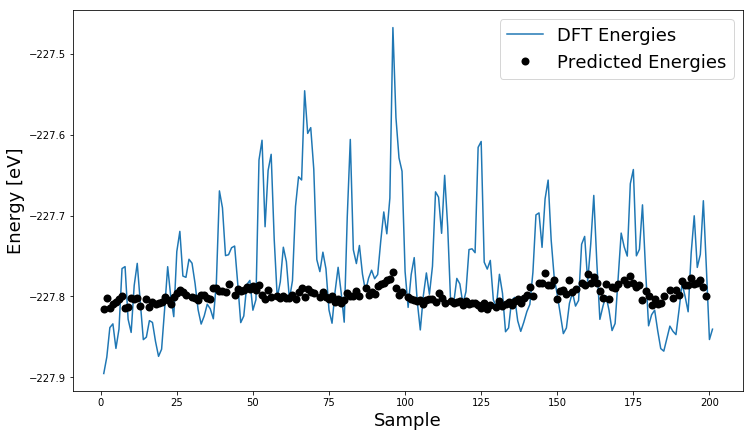

In [29]:
fig = plt.figure(figsize=(12, 7)); 
plt.plot(np.linspace(1, SIM_NO, SIM_NO), ens, label = 'DFT Energies'); 
plt.plot(test_indices, y_pred, 'k.', MarkerSize = 10, mew = 3, label = 'Predicted Energies'); 
plt.legend(fontsize = 18)
plt.xlabel('Sample', fontsize = 18)
plt.ylabel('Energy [eV]', fontsize = 18)
plt.show(); 



[1] Brockherde et al. Bypassing the Kohn-Sham equations with machine learning. Nature Communications 8, 872 (2017)